In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 10)

In [2]:
housedata = pd.read_csv('data/lianjia100.csv',index_col = False ,header = None)
housedata.head()

,0,1,2,3,4,5,6,7
0,0,精装套一，干湿分离，12年新小区，位置好,92.0,单价12264元/平米,万科东郡 | 1室1厅 | 75.02平米 | 南 | 精装 | 有电梯,18人关注 / 共6次带看 / 3个月以前发布,高楼层(共24层)2014年建板楼 - 即墨,VR房源房本满两年随时看房
1,0,经典套二 南北通透格局 采光好,127.0,单价14672元/平米,一中小区 | 2室1厅 | 86.56平米 | 南 北 | 精装 | 无电梯,21人关注 / 共23次带看 / 1个月以前发布,低楼层(共7层)2003年建板楼 - 香江路,VR房源房本满两年
2,0,怡和嘉园北区 精装修 交通便利 新小区,130.0,单价15145元/平米,怡和嘉园北区 | 2室1厅 | 85.84平米 | 南 北 | 精装,16人关注 / 共11次带看 / 1个月以前发布,中楼层(共24层)2011年建板楼 - 薛家岛,VR房源房本满五年
3,0,万达广场 经典正规套二 楼层好 随时看房,190.0,单价22801元/平米,万达中央公馆 | 2室1厅 | 83.33平米 | 南 北 | 简装 | 有电梯,26人关注 / 共14次带看 / 5天以前发布,高楼层(共31层)2013年建板楼 - 李沧万达,近地铁VR房源房本满两年随时看房
4,0,怡和嘉园，70年产权 南北卧，西厅，采光好,130.0,单价14445元/平米,怡和嘉园北区 | 2室1厅 | 90平米 | 北 南 | 精装 | 有电梯,26人关注 / 共11次带看 / 8天以前发布,低楼层(共22层)2011年建板楼 - 薛家岛,VR房源房本满五年


In [3]:
# data cleaning 
housedata = housedata.drop(0,axis = 1)
housedata[3]=housedata[3].str.extract('(\d+)').astype(int)
housedata = housedata.rename(columns={1:'小区名',2:'挂牌价格/万',3:'元/平米'})

housedata.head()

,小区名,挂牌价格/万,元/平米,4,5,6,7
0,精装套一，干湿分离，12年新小区，位置好,92.0,12264,万科东郡 | 1室1厅 | 75.02平米 | 南 | 精装 | 有电梯,18人关注 / 共6次带看 / 3个月以前发布,高楼层(共24层)2014年建板楼 - 即墨,VR房源房本满两年随时看房
1,经典套二 南北通透格局 采光好,127.0,14672,一中小区 | 2室1厅 | 86.56平米 | 南 北 | 精装 | 无电梯,21人关注 / 共23次带看 / 1个月以前发布,低楼层(共7层)2003年建板楼 - 香江路,VR房源房本满两年
2,怡和嘉园北区 精装修 交通便利 新小区,130.0,15145,怡和嘉园北区 | 2室1厅 | 85.84平米 | 南 北 | 精装,16人关注 / 共11次带看 / 1个月以前发布,中楼层(共24层)2011年建板楼 - 薛家岛,VR房源房本满五年
3,万达广场 经典正规套二 楼层好 随时看房,190.0,22801,万达中央公馆 | 2室1厅 | 83.33平米 | 南 北 | 简装 | 有电梯,26人关注 / 共14次带看 / 5天以前发布,高楼层(共31层)2013年建板楼 - 李沧万达,近地铁VR房源房本满两年随时看房
4,怡和嘉园，70年产权 南北卧，西厅，采光好,130.0,14445,怡和嘉园北区 | 2室1厅 | 90平米 | 北 南 | 精装 | 有电梯,26人关注 / 共11次带看 / 8天以前发布,低楼层(共22层)2011年建板楼 - 薛家岛,VR房源房本满五年


In [4]:
# differentiate tags
set(housedata[7].unique())

{'VR房源',
 'VR房源房本满两年',
 'VR房源房本满两年随时看房',
 'VR房源房本满五年',
 'VR房源房本满五年随时看房',
 'VR房源随时看房',
 nan,
 '房本满两年',
 '房本满两年随时看房',
 '房本满五年',
 '房本满五年随时看房',
 '近地铁',
 '近地铁VR房源',
 '近地铁VR房源房本满两年',
 '近地铁VR房源房本满两年随时看房',
 '近地铁VR房源房本满五年',
 '近地铁VR房源房本满五年随时看房',
 '近地铁VR房源随时看房',
 '近地铁房本满两年',
 '近地铁房本满五年',
 '随时看房'}

In [5]:
# differentiate tags
housedata['tags'] = ''
keyword_list = ['近地铁','房本满两年','房本满五年']
def split_tags(keyword):
    for i,row in housedata.iterrows():
        for item in keyword:
            if item in str(housedata[7][i]):
                if housedata['tags'][i]=='':
                    housedata['tags'][i] = item
                else:
                    housedata['tags'][i] = housedata['tags'][i]+ ',' + item

split_tags(keyword_list)

In [6]:
housedata = housedata.drop(7,axis = 1)
housedata

,小区名,挂牌价格/万,元/平米,4,5,6,tags
0,精装套一，干湿分离，12年新小区，位置好,92.0,12264,万科东郡 | 1室1厅 | 75.02平米 | 南 | 精装 | 有电梯,18人关注 / 共6次带看 / 3个月以前发布,高楼层(共24层)2014年建板楼 - 即墨,房本满两年
1,经典套二 南北通透格局 采光好,127.0,14672,一中小区 | 2室1厅 | 86.56平米 | 南 北 | 精装 | 无电梯,21人关注 / 共23次带看 / 1个月以前发布,低楼层(共7层)2003年建板楼 - 香江路,房本满两年
2,怡和嘉园北区 精装修 交通便利 新小区,130.0,15145,怡和嘉园北区 | 2室1厅 | 85.84平米 | 南 北 | 精装,16人关注 / 共11次带看 / 1个月以前发布,中楼层(共24层)2011年建板楼 - 薛家岛,房本满五年
3,万达广场 经典正规套二 楼层好 随时看房,190.0,22801,万达中央公馆 | 2室1厅 | 83.33平米 | 南 北 | 简装 | 有电梯,26人关注 / 共14次带看 / 5天以前发布,高楼层(共31层)2013年建板楼 - 李沧万达,"近地铁,房本满两年"
4,怡和嘉园，70年产权 南北卧，西厅，采光好,130.0,14445,怡和嘉园北区 | 2室1厅 | 90平米 | 北 南 | 精装 | 有电梯,26人关注 / 共11次带看 / 8天以前发布,低楼层(共22层)2011年建板楼 - 薛家岛,房本满五年
...,...,...,...,...,...,...,...
2965,百通多层 满五唯一 明星房源 婚装 业主忍痛急售,205.0,21772,百通馨苑七区 | 2室2厅 | 94.16平米 | 南 北 | 精装 | 无电梯,84人关注 / 共0次带看 / 7个月以前发布,中楼层(共6层)2008年建板楼 - 下王埠,房本满五年
2966,拉菲全明套二，采光优异户型舒适，价钱可议，公摊小。,125.0,17825,鑫江拉菲庄园 | 2室2厅 | 70.13平米 | 南 | 精装 | 有电梯,199人关注 / 共0次带看 / 7个月以前发布,中楼层(共8层)2012年建板楼 - 流亭,房本满五年
2967,金桂花园，双南一北卧套三厅，看房方便，中间楼层！,285.0,31883,金桂花园 | 3室1厅 | 89.39平米 | 南 北 | 简装 | 有电梯,8人关注 / 共0次带看 / 7个月以前发布,中楼层(共7层)2003年建板楼 - 四方实验小区,"近地铁,房本满五年"
2968,百通馨苑，多层顶加阁，东户，采光充足,336.0,31756,百通馨苑一区 | 3室2厅 | 105.81平米 | 南 北 | 简装 | 无电梯,4人关注 / 共0次带看 / 7个月以前发布,高楼层(共7层)2005年建板楼 - 下王埠,房本满五年


In [7]:
# now take care of the middle three big columns
foo = lambda x: pd.Series([i for i in x.split(' | ')])
bar = lambda x: pd.Series([i for i in x.split(' / ')])
baz = lambda x: pd.Series([i for i in x.split(' - ')])

In [8]:
basic = housedata[4].apply(foo)
follow = housedata[5].fillna('').apply(bar)
floor = housedata[6].fillna('').apply(baz)

In [9]:
basic.head()

,0,1,2,3,4,5,6
0,万科东郡,1室1厅,75.02平米,南,精装,有电梯,NaN
1,一中小区,2室1厅,86.56平米,南 北,精装,无电梯,NaN
2,怡和嘉园北区,2室1厅,85.84平米,南 北,精装,NaN,NaN
3,万达中央公馆,2室1厅,83.33平米,南 北,简装,有电梯,NaN
4,怡和嘉园北区,2室1厅,90平米,北 南,精装,有电梯,NaN


In [10]:
# check the specific data in certain place
def check_data(df,keyword,col):
    """
    @df: name of the dataframe that is going to be checked.
    @keyword: the keyword to be looked up in the df
    @col: column name
    """
    for i,row in df.iterrows():
        if keyword in df[col][i]:
            print(i,row[col])

In [11]:
check_data(basic,'别墅',1)

956 叠拼别墅
1281 叠拼别墅
2700 联排别墅


In [12]:
# to align the data with the dataset
def shift_row(df,index_num,keyword,range_lim):
    """
    @df: the dataframe that is going to be operated at
    @index_num: int, index num that where the keyword happen
    @keyword: str, the word that is going to be replaced after the shift
    @range_lim: int, the upper limit for the for loop. 
    """
    for i in range(1,range_lim):
        df[i][index_num] = df[i+1][index_num]
        if (i==5):
            df[i+1][index_num]=keyword

shift_row(basic,956,'叠拼别墅',6)
shift_row(basic,1281,'叠拼别墅',6)
shift_row(basic,2700,'联排别墅',6)

In [13]:
basic.iloc[[956,1281,2700],]

,0,1,2,3,4,5,6
956,万科青岛小镇,3室2厅,136.35平米,南 北,毛坯,无电梯,叠拼别墅
1281,世茂诺沙湾,3室2厅,108.34平米,南,毛坯,NaN,叠拼别墅
2700,阳光山庄,2室2厅,124.55平米,南,精装,无电梯,联排别墅


In [14]:
basic[2]=basic[2].str.extract('(\d+)').astype(int)

In [15]:
set(basic[3].unique())

{'东',
 '东 东北',
 '东 东南',
 '东 东南 北',
 '东 东南 南',
 '东 北',
 '东 南',
 '东 南 北',
 '东 南 西',
 '东 南 西 北',
 '东 西',
 '东 西 北',
 '东北',
 '东南',
 '东南 北',
 '东南 南',
 '东南 南 北',
 '东南 西',
 '北',
 '北 南',
 '南',
 '南 东 东南',
 '南 东 北',
 '南 东南',
 '南 北',
 '南 北 西',
 '南 西',
 '南 西 北',
 '南 西南',
 '西',
 '西 北',
 '西北',
 '西北 北',
 '西南',
 '西南 东北',
 '西南 北',
 '西南 西'}

In [16]:
basic['朝向'] = ''
keyword_list2 = ['东北','东南','西北','西南','东','南','西','北']

for i,row in basic.iterrows():
    for item in keyword_list2:
        if item in str(basic[3][i]):
            basic[3][i]= basic[3][i].replace(item,'')
            if basic['朝向'][i]=='':
                basic['朝向'][i] = item
            else:
                basic['朝向'][i] = basic['朝向'][i]+ ',' + item



In [17]:
set(basic[3].unique())
#good

{'', ' ', '  ', '   '}

In [18]:
basic = basic.drop(3,axis = 1)
basic

,0,1,2,4,5,6,朝向
0,万科东郡,1室1厅,75,精装,有电梯,NaN,南
1,一中小区,2室1厅,86,精装,无电梯,NaN,"南,北"
2,怡和嘉园北区,2室1厅,85,精装,NaN,NaN,"南,北"
3,万达中央公馆,2室1厅,83,简装,有电梯,NaN,"南,北"
4,怡和嘉园北区,2室1厅,90,精装,有电梯,NaN,"南,北"
...,...,...,...,...,...,...,...
2965,百通馨苑七区,2室2厅,94,精装,无电梯,NaN,"南,北"
2966,鑫江拉菲庄园,2室2厅,70,精装,有电梯,NaN,南
2967,金桂花园,3室1厅,89,简装,有电梯,NaN,"南,北"
2968,百通馨苑一区,3室2厅,105,简装,无电梯,NaN,"南,北"


In [19]:
basic[5] = basic[5].fillna('')
basic[6] = basic[6].fillna('')

In [20]:
set(basic[6].unique())

{'', '叠拼别墅', '联排别墅'}

In [21]:
basic = basic.rename(columns={0:'小区名', 1:'几室几厅', 2:'总面积',4:'装修情况', 5:'有无电梯',6:'别墅'})
basic

,小区名,几室几厅,总面积,装修情况,有无电梯,别墅,朝向
0,万科东郡,1室1厅,75,精装,有电梯,,南
1,一中小区,2室1厅,86,精装,无电梯,,"南,北"
2,怡和嘉园北区,2室1厅,85,精装,,,"南,北"
3,万达中央公馆,2室1厅,83,简装,有电梯,,"南,北"
4,怡和嘉园北区,2室1厅,90,精装,有电梯,,"南,北"
...,...,...,...,...,...,...,...
2965,百通馨苑七区,2室2厅,94,精装,无电梯,,"南,北"
2966,鑫江拉菲庄园,2室2厅,70,精装,有电梯,,南
2967,金桂花园,3室1厅,89,简装,有电梯,,"南,北"
2968,百通馨苑一区,3室2厅,105,简装,无电梯,,"南,北"


In [22]:
floor

,0,1
0,高楼层(共24层)2014年建板楼,即墨
1,低楼层(共7层)2003年建板楼,香江路
2,中楼层(共24层)2011年建板楼,薛家岛
3,高楼层(共31层)2013年建板楼,李沧万达
4,低楼层(共22层)2011年建板楼,薛家岛
...,...,...
2965,中楼层(共6层)2008年建板楼,下王埠
2966,中楼层(共8层)2012年建板楼,流亭
2967,中楼层(共7层)2003年建板楼,四方实验小区
2968,高楼层(共7层)2005年建板楼,下王埠


In [23]:
floor[['楼层高低','b']] = floor[0].str.split('(',expand=True)
floor[['b','c']] = floor['b'].str.split(')',expand=True)
floor[['建造年份','建筑形式']] = floor.c.str.split('年建',expand = True)
floor.head()
#1,high/low ,b, year, structure needed

,0,1,楼层高低,b,c,建造年份,建筑形式
0,高楼层(共24层)2014年建板楼,即墨,高楼层,共24层,2014年建板楼,2014,板楼
1,低楼层(共7层)2003年建板楼,香江路,低楼层,共7层,2003年建板楼,2003,板楼
2,中楼层(共24层)2011年建板楼,薛家岛,中楼层,共24层,2011年建板楼,2011,板楼
3,高楼层(共31层)2013年建板楼,李沧万达,高楼层,共31层,2013年建板楼,2013,板楼
4,低楼层(共22层)2011年建板楼,薛家岛,低楼层,共22层,2011年建板楼,2011,板楼


In [24]:

def fix_bad_data(df,col_name,index_num,keyword=''):
    df[col_name][index_num]=keyword

fix_bad_data(floor,'楼层高低',1848,'')
fix_bad_data(floor,'b',1848,'2')
fix_bad_data(floor,'建造年份',1848,'2011')
fix_bad_data(floor,'建筑形式',1848,'')

fix_bad_data(floor,'楼层高低',2700,'')
fix_bad_data(floor,'b',2700,'3')
fix_bad_data(floor,'建造年份',2700,'2003')
fix_bad_data(floor,'建筑形式',2700,'')

fix_bad_data(floor,'楼层高低',1483,'')
fix_bad_data(floor,'b',1483,'4')
fix_bad_data(floor,'建造年份',1483,'2013')
fix_bad_data(floor,'建筑形式',1483,'板楼')

fix_bad_data(floor,'楼层高低',2788,'')
fix_bad_data(floor,'b',2788,'5')
fix_bad_data(floor,'建造年份',2788,'2015')
fix_bad_data(floor,'建筑形式',2788,'板楼')


In [25]:
check_data(floor,'暂无数据','建造年份')

175 暂无数据 
368 暂无数据 
373 暂无数据 
384 暂无数据 
505 暂无数据 
655 暂无数据 
1306 暂无数据 
1416 暂无数据 
1726 暂无数据 
1764 暂无数据 
1769 暂无数据 
2015 暂无数据 
2197 暂无数据 
2209 暂无数据 
2259 暂无数据 
2794 暂无数据 
2863 暂无数据 
2890 暂无数据 


In [26]:
# fix bad group of data
for i,row in floor.iterrows():
    #remove the white spaces around the string
    floor['建造年份'][i] = floor['建造年份'][i].strip()
    if not floor['建筑形式'][i] is None:
        floor['建筑形式'][i] = floor['建筑形式'][i].strip() 
        
    if (floor['建造年份'][i] == '暂无数据') or (floor['建造年份'][i] == '板塔结合') or  (floor['建造年份'][i] == '板楼'):
        floor['建筑形式'][i] = row['建造年份']
        floor['建造年份'][i] = ''
    if floor['建筑形式'][i] == '暂无数据':
        floor['建筑形式'][i] = ''


In [27]:
set(floor['建筑形式'].unique())

{'', '塔楼', '板塔结合', '板楼'}

In [28]:
# only need the digit in the col
floor.b = floor.b.str.extract('(\d+)').astype(int)


In [29]:
floor.head()

,0,1,楼层高低,b,c,建造年份,建筑形式
0,高楼层(共24层)2014年建板楼,即墨,高楼层,24,2014年建板楼,2014,板楼
1,低楼层(共7层)2003年建板楼,香江路,低楼层,7,2003年建板楼,2003,板楼
2,中楼层(共24层)2011年建板楼,薛家岛,中楼层,24,2011年建板楼,2011,板楼
3,高楼层(共31层)2013年建板楼,李沧万达,高楼层,31,2013年建板楼,2013,板楼
4,低楼层(共22层)2011年建板楼,薛家岛,低楼层,22,2011年建板楼,2011,板楼


In [30]:
floor = (floor.drop([0,'c'], axis = 1).rename(columns = { 1:'区域', 'b':'楼共有几层' }))

In [31]:
floor.head()

,区域,楼层高低,楼共有几层,建造年份,建筑形式
0,即墨,高楼层,24,2014,板楼
1,香江路,低楼层,7,2003,板楼
2,薛家岛,中楼层,24,2011,板楼
3,李沧万达,高楼层,31,2013,板楼
4,薛家岛,低楼层,22,2011,板楼


### Now need to build a new column: floor.distric 
it is to map all the 区域 into 10 district area, such as 市北区,市南区 and etc.
here we need to use baidu api to match all the distric areas, and as well as the GPS coordination.


In [32]:
follow.head()

,0,1,2
0,18人关注,共6次带看,3个月以前发布
1,21人关注,共23次带看,1个月以前发布
2,16人关注,共11次带看,1个月以前发布
3,26人关注,共14次带看,5天以前发布
4,26人关注,共11次带看,8天以前发布


In [33]:
#replace extra characters, only left with numbers
follow[0]=follow[0].str.extract('(\d+)').astype(int)
follow[1]=follow[1].str.extract('(\d+)').astype(int)
follow[2]=follow[2].str.strip('以前发布')

In [34]:
follow.head()

,0,1,2
0,18,6,3个月
1,21,23,1个月
2,16,11,1个月
3,26,14,5天
4,26,11,8天


In [35]:
def extract_deal_date(col_name,keyword):
    follow[col_name]=''
    for i,row in follow.iterrows():
        if keyword in follow[2][i]:
            follow[col_name][i] = row[2].strip(keyword)
        #print(i,row[2])
extract_deal_date('几月以前发布','个月')
extract_deal_date('几年以前发布','年')
extract_deal_date('几天以前发布','天')

In [36]:
for i,row in follow.iterrows():
    if '一' in follow['几年以前发布'][i]:
        follow['几年以前发布'][i] = 1


In [37]:
follow.head()

,0,1,2,几月以前发布,几年以前发布,几天以前发布
0,18,6,3个月,3,,
1,21,23,1个月,1,,
2,16,11,1个月,1,,
3,26,14,5天,,,5
4,26,11,8天,,,8


In [38]:
follow= follow.rename(columns={0:'几人关注',1:'带看次数',2:'多久以前发布'})
follow.head()

,几人关注,带看次数,多久以前发布,几月以前发布,几年以前发布,几天以前发布
0,18,6,3个月,3,,
1,21,23,1个月,1,,
2,16,11,1个月,1,,
3,26,14,5天,,,5
4,26,11,8天,,,8


In [ ]:
floor['建造年份']= floor['建造年份'].astype(int)

In [ ]:
follow['几月以前发布'] = follow['几月以前发布'].replace('',0).astype(int)
follow['几年以前发布'] = follow['几年以前发布'].replace('',0).astype(int)
follow['几天以前发布'] = follow['几天以前发布'].replace('',0).astype(int)

In [44]:
follow.head()

,几人关注,带看次数,多久以前发布,几月以前发布,几年以前发布,几天以前发布
0,18,6,3个月,3,,
1,21,23,1个月,1,,
2,16,11,1个月,1,,
3,26,14,5天,,,5
4,26,11,8天,,,8


In [105]:
new_data =(pd.merge(housedata[['小区名','挂牌价格/万','元/平米','tags']],basic,left_index=True,right_index=True, how='left')
            .merge(floor,left_index=True,right_index=True,how='left')
            .merge(follow,left_index=True,right_index=True,how='left'))
new_data = new_data.rename(columns = {'小区名_x':'标题','小区名_y':'小区名'})
new_data 

,标题,挂牌价格/万,元/平米,tags,小区名,几室几厅,总面积,装修情况,有无电梯,别墅,...,楼层高低,楼共有几层,建造年份,建筑形式,几人关注,带看次数,多久以前发布,几月以前发布,几年以前发布,几天以前发布
0,精装套一，干湿分离，12年新小区，位置好,92.0,12264,房本满两年,万科东郡,1室1厅,75,精装,有电梯,,...,高楼层,24,2014,板楼,18,6,3个月,3,0,0
1,经典套二 南北通透格局 采光好,127.0,14672,房本满两年,一中小区,2室1厅,86,精装,无电梯,,...,低楼层,7,2003,板楼,21,23,1个月,1,0,0
2,怡和嘉园北区 精装修 交通便利 新小区,130.0,15145,房本满五年,怡和嘉园北区,2室1厅,85,精装,,,...,中楼层,24,2011,板楼,16,11,1个月,1,0,0
3,万达广场 经典正规套二 楼层好 随时看房,190.0,22801,"近地铁,房本满两年",万达中央公馆,2室1厅,83,简装,有电梯,,...,高楼层,31,2013,板楼,26,14,5天,0,0,5
4,怡和嘉园，70年产权 南北卧，西厅，采光好,130.0,14445,房本满五年,怡和嘉园北区,2室1厅,90,精装,有电梯,,...,低楼层,22,2011,板楼,26,11,8天,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,百通多层 满五唯一 明星房源 婚装 业主忍痛急售,205.0,21772,房本满五年,百通馨苑七区,2室2厅,94,精装,无电梯,,...,中楼层,6,2008,板楼,84,0,7个月,7,0,0
2966,拉菲全明套二，采光优异户型舒适，价钱可议，公摊小。,125.0,17825,房本满五年,鑫江拉菲庄园,2室2厅,70,精装,有电梯,,...,中楼层,8,2012,板楼,199,0,7个月,7,0,0
2967,金桂花园，双南一北卧套三厅，看房方便，中间楼层！,285.0,31883,"近地铁,房本满五年",金桂花园,3室1厅,89,简装,有电梯,,...,中楼层,7,2003,板楼,8,0,7个月,7,0,0
2968,百通馨苑，多层顶加阁，东户，采光充足,336.0,31756,房本满五年,百通馨苑一区,3室2厅,105,简装,无电梯,,...,高楼层,7,2005,板楼,4,0,7个月,7,0,0


In [106]:
new_data.to_csv('data/lianjia100_clean.csv',index = False,encoding = 'utf-8')

In [7]:
new_data = pd.read_csv('data/lianjia100_clean.csv')
new_data.columns

Index(['标题', '挂牌价格/万', '元/平米', 'tags', '小区名', '几室几厅', '总面积', '装修情况', '有无电梯',
       '别墅', '朝向', '区域', '楼层高低', '楼共有几层', '建造年份', '建筑形式', '几人关注', '带看次数',
       '多久以前发布', '几月以前发布', '几年以前发布', '几天以前发布'],
      dtype='object')

# Some EDA Below

In [77]:
test = pd.DataFrame([new_data['几室几厅'],new_data['建造年份']]).T
test.head()

,几室几厅,建造年份
0,1室1厅,2014
1,2室1厅,2003
2,2室1厅,2011
3,2室1厅,2013
4,2室1厅,2011


In [79]:
split_years = test.groupby(['几室几厅', '建造年份']).size().unstack(fill_value=0)
split_years = split_years.drop(0,axis=1)
split_years.head()

建造年份,1974,1976,1978,1979,1980,1981,1982,1983,1984,1985,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
几室几厅,,,,,,,,,,,,,,,,,,,,,
1室0厅,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
1室1厅,0,0,0,0,0,0,0,0,1,0,...,17,14,8,13,5,4,5,2,0,0
1室2厅,0,0,0,0,0,0,0,0,0,0,...,0,2,3,5,0,0,0,1,0,0
2室0厅,0,2,0,1,0,0,1,1,3,2,...,0,0,0,0,0,0,0,0,0,0
2室1厅,1,0,1,2,0,0,4,0,3,5,...,41,43,49,69,46,24,30,14,1,2


In [80]:
split_years['total'] =  split_years.sum(axis=1)
split_years.head()

建造年份,1974,1976,1978,1979,1980,1981,1982,1983,1984,1985,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,total
几室几厅,,,,,,,,,,,,,,,,,,,,,
1室0厅,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,14
1室1厅,0,0,0,0,0,0,0,0,1,0,...,14,8,13,5,4,5,2,0,0,169
1室2厅,0,0,0,0,0,0,0,0,0,0,...,2,3,5,0,0,0,1,0,0,17
2室0厅,0,2,0,1,0,0,1,1,3,2,...,0,0,0,0,0,0,0,0,0,53
2室1厅,1,0,1,2,0,0,4,0,3,5,...,43,49,69,46,24,30,14,1,2,816


In [99]:
split_years.sort_values(['total'], ascending = False,axis = 0,inplace = True )
years = list(map(int,range(1974,2019))) #to 2018
df_top10 = split_years[:5].drop(['total'],axis = 1)
df_top10= df_top10.transpose()
df_top10

几室几厅,2室1厅,3室2厅,2室2厅,3室1厅,1室1厅
建造年份,,,,,
1974,1,0,0,0,0
1976,0,0,0,0,0
1978,1,0,0,0,0
1979,2,0,0,0,0
1980,0,0,0,1,0
...,...,...,...,...,...
2014,24,51,23,18,4
2015,30,41,32,15,5
2016,14,14,15,3,2


<IPython.core.display.Javascript object>


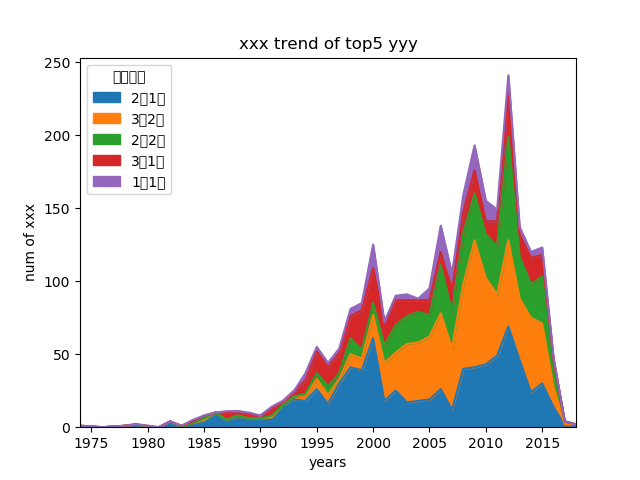

In [100]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
df_top10.plot(kind='area')
plt.title('xxx trend of top5 yyy')
plt.ylabel('num of xxx')
plt.xlabel('years')
plt.show()